In [7]:
import numpy as np
from importlib import reload
import matplotlib.pyplot as plt

import shapely as sp
import shapely.geometry

In [11]:
import polymetric as pm
reload(pm)
import polymetric.exporters.dxf
import polymetric.exporters.gds
import polymetric.plotting

In [9]:
def generate_jbeam(**kw):
    # parameters
    hole_b = kw.pop("hole_b", 0.750/2.0)
    hole_a = kw.pop("hole_a", 0.270/2.0)

    slit_d = kw.pop("slit_d", 0.045)
    beam_w = kw.pop("beam_w", 0.900)
    beam_l = kw.pop("beam_l", 10.0)

    holes_n = kw.pop("holes_n", 11)

    defect_d = kw.pop("defect_d", 0.400)
    lattice_d = kw.pop("lattice_d", 0.450)
    
    # actual construction of geometry
    hole = pm.Ellipse(a=hole_a, b=hole_b, x=defect_d/2)
    hole_sweep = pm.ParametricSweep(
        constructor=hole.clone,
        sweep_over=np.arange(holes_n),
        sweep_params = {
            'x': lambda n: defect_d/2 + n*lattice_d,
#             'b': lambda n: hole_b if n > 2 else (0.7 + 0.1*n)*hole_b,
#             'a': lambda n: hole_a if n > 2 else (0.7 + 0.1*n)*hole_a,
        }
    )
    hole_sweep_mirror = pm.Scaled(hole_sweep, scales=(-1.0, 1.0))
    all_holes = pm.Combined([hole_sweep, hole_sweep_mirror])
    full_beam = pm.Rectangle(x=0.0, y=0.0, w=beam_l, h=beam_w)
    minus_holes = pm.Difference([full_beam, all_holes])
    minus_slit = pm.Difference([minus_holes, pm.Rectangle(x=0.0, y=0.0, w=beam_l, h=slit_d)])
    
    return minus_slit

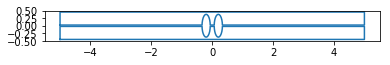

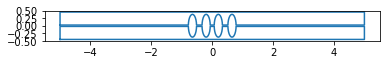

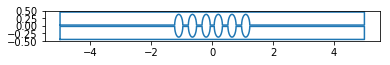

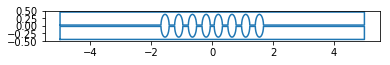

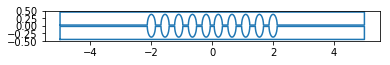

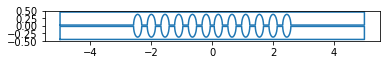

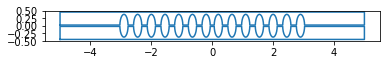

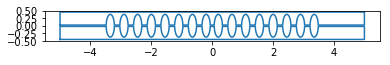

/Users/jesse/Code/polymetric/polymetric/exporters/gds.py:27: RuntimeWarning: [GDSPY] A polygon with more than 199 points was created (not officially supported by the GDSII format).
  gds_poly = gdspy.Polygon(vl[:-1], datatype=datatype)


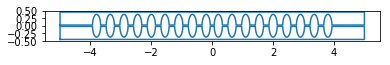

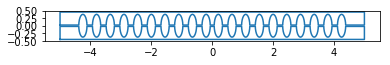

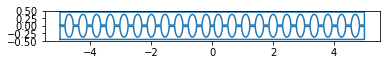

In [13]:
beam_polys = []

for i in range(1,12):
    poly = generate_jbeam(holes_n=i)
    pm.plotting.inspect_shapes(poly)
    pm.exporters.dxf.save(poly, "test_generated_files/beam_n_%d.dxf" % i)
    pm.exporters.gds.save(poly, "test_generated_files/beam_n_%d.gds" % i)
    beam_polys.append(poly)

In [14]:
poly.get_exterior_vertex_lists()

[[(-5.0, -0.45),
  (-5.0, -0.0225),
  (-4.833933614769542, -0.0225),
  (-4.830399986549025, -0.09705714191344528),
  (-4.816913429510899, -0.18749999999999997),
  (-4.795459415460184, -0.2651650429449553),
  (-4.7675, -0.3247595264191645),
  (-4.73494057108884, -0.3622221848584006),
  (-4.7, -0.375),
  (-4.66505942891116, -0.36222218485840063),
  (-4.6325, -0.32475952641916456),
  (-4.604540584539817, -0.26516504294495535),
  (-4.583086570489101, -0.1875000000000001),
  (-4.569600013450976, -0.09705714191344539),
  (-4.566066385230458, -0.0225),
  (-4.383933614769542, -0.0225),
  (-4.380399986549024, -0.09705714191344528),
  (-4.366913429510899, -0.18749999999999997),
  (-4.3454594154601835, -0.2651650429449553),
  (-4.3175, -0.3247595264191645),
  (-4.28494057108884, -0.3622221848584006),
  (-4.25, -0.375),
  (-4.21505942891116, -0.36222218485840063),
  (-4.1825, -0.32475952641916456),
  (-4.1545405845398165, -0.26516504294495535),
  (-4.133086570489101, -0.1875000000000001),
  (-4.11